In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets

from skimage.feature import hog
from skimage import data, color, exposure
from sklearn.decomposition import PCA

###########################################

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

###########################################

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Imports
import numpy as np
import tensorflow as tf
import csv

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
(512, 512)


AttributeError: 'numpy.ndarray' object has no attribute 'append'

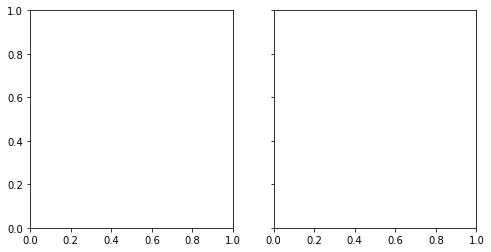

In [5]:

with open('./datasets/bikes_filtered.csv', 'r') as f:
        datareader = csv.reader(f)
        for data in datareader:
            print(data)

images = []
images.append(color.rgb2gray(data.astronaut()))
images.append(color.rgb2gray(data.astronaut()))
images.append(color.rgb2gray(data.camera()))
images.append(color.rgb2gray(data.checkerboard()))


hog_array = np.zeros((3, len(images)))
print(hog_array)
for image in images:
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(32, 32),
                        cells_per_block=(1, 1), visualise=True, block_norm='L2-Hys')

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

    #print(fd)
    #print(hog_image)

    print(hog_image.shape)
    flattened_len = int(hog_image.shape[0]) * int(hog_image.shape[1])

    pixels = np.reshape(hog_image, (-1, flattened_len))
    hog_array.append(pixels)
    
print(hog_array.shape)

pca = PCA(n_components=2)
pca.fit(hog_array)
#pca.fit(hog_image)
#hog_images_compressed = pca.transform(hog_array)
#print("hog_images_compressed")
#print(hog_images_compressed.shape)
#flatten

#run PCA

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box-forced')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax1.set_adjustable('box-forced')
plt.show()

Coefficients: 
 [ 938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


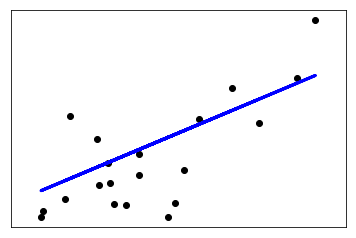

In [12]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()